In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io

In [2]:
 def plt_im(X):
    '''Plots grayscale image X.'''
    
    plt.figure(figsize=(36, 21))
    plt.imshow(X, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()

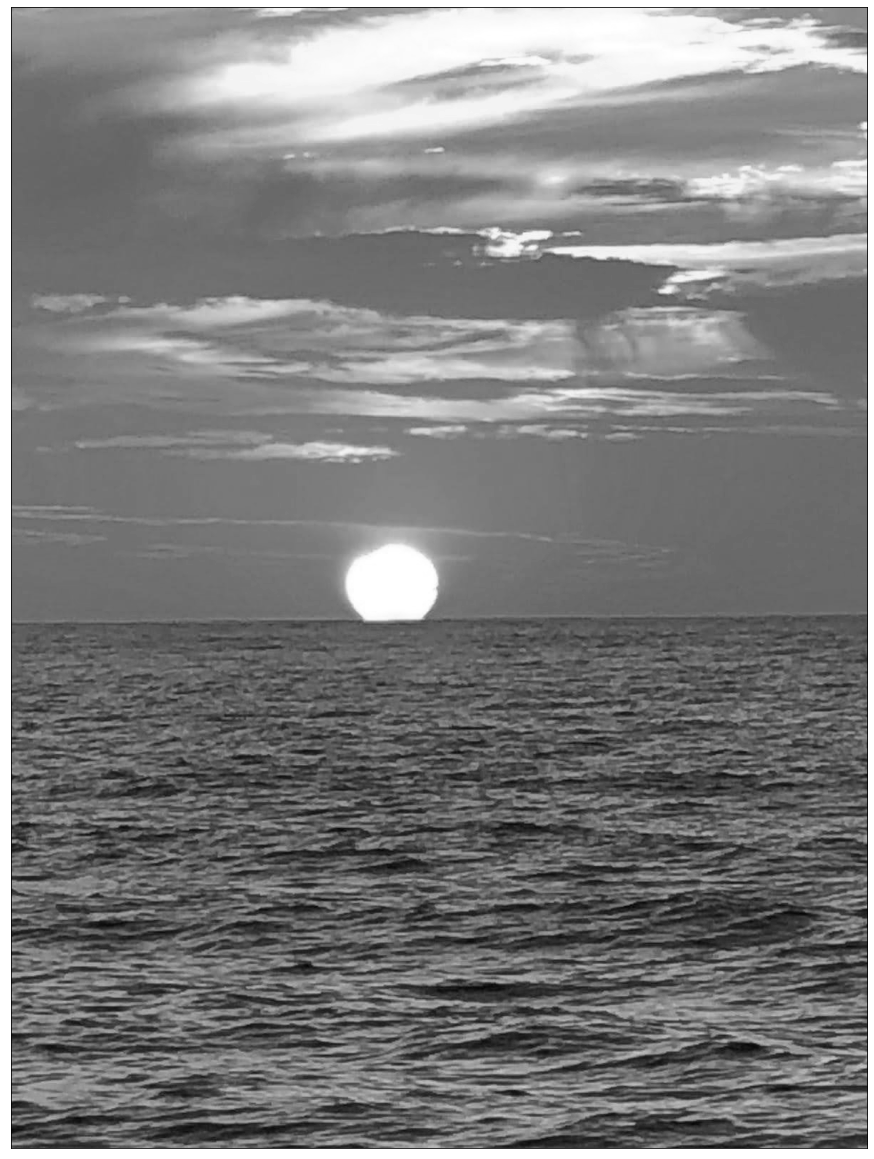

(1600, 1200)


In [3]:
img = io.imread('./data/sunset.jpg')
img = color.rgb2gray(img)
plt_im(img)
print(img.shape)

In [4]:
# my solution for convolution and pooling

def out_size(m_in, k, p, s):
    m_out = ((m_in - k + 2*p) / s) + 1
    m_floor = np.floor(m_out)
    
    if not np.isclose(m_out, m_floor):
        # raise ValueError(f'Expected integer as input: {m_out}')
        pass
        
    return int(m_floor)


def conv2(X, F=[[1]], p=0, s=[1, 1]):
    '''
    X is a grayscale image of shape (h, w)
    F is a filter of shape (kh, kw)
    p is the padding size
    s is the stride
    
    The padding size is identical for the height and width. The stride s is a list 
    consisting of two elements. The first element s[0] is the stride along the 
    height and the second element s[1] is the stride along the width.
    
    This function throws an error if the filter size, padding, and stride
    are chosen in such a way that the output height or width is not an integer. 
    '''
    
    X = np.array(X)
    F = np.array(F)
     
    h, w = X.shape
    kh, kw = F.shape
    sh, sw  = s
    
    h_out = out_size(h, kh, p, sh)
    w_out = out_size(w, kw, p, sw)
    
    Z = np.zeros((2*p + h, 2*p + w))
    Z[p:h+p, p:w+p] = X
    
    O = np.zeros((h_out, w_out))
    
    for r in range(h_out):
        for c in range(w_out):
            O[r, c] = (Z[sh*r:sh*r+kh, sw*c:sw*c+kw] * F).sum()
            
    return O
    
def pool2(X, k=[2, 2], s=[1, 1], action=np.min):
    '''
    X is a grayscale image of shape (h, w)
    k is the filter size 
    s is the stride
    
    The filter size k and stride s are lists consisting of two elements. 
    The first sizes k[0], s[0] refer to the height and the second sizes 
    k[1], s[1] refer to the width.
    
    This function throws an error if the filter size and stride are chosen 
    in such a way that the output height or width is not an integer. 
    '''
    
    X = np.array(X)
     
    h, w = X.shape
    kh, kw = k
    sh, sw  = s
    
    h_out = out_size(h, kh, 0, sh)
    w_out = out_size(w, kw, 0, sw)
    
    O = np.zeros((h_out, w_out))
    
    for r in range(h_out):
        for c in range(w_out):
            O[r, c] = action(X[sh*r:sh*r+kh, sw*c:sw*c+kw])
            
    return O

In [5]:
# Sobel filter for detecting vertical edges
F_ver = np.array([
    [1, 0, -1], 
    [2, 0, -2],
    [1, 0, -1]
])

# Sobel filter for detecting horizontal edges
F_hor = np.array([
    [1, 2, 1], 
    [0, 0, 0],
    [-1, -2, -1]
])

# Your filters can go here
F_1 = np.array([
    [-1, -1, -1],
    [-1,  0, -1], 
    [-1, -1, -1]
])

F_2 = np.array([
    [1, 2, 1],
    [2, 4, 2], 
    [1, 2, 1]
])/16

sigmoid = lambda x: 1/(1 + np.exp(-x))
relu = lambda x: np.maximum(0, x)

conv vertical


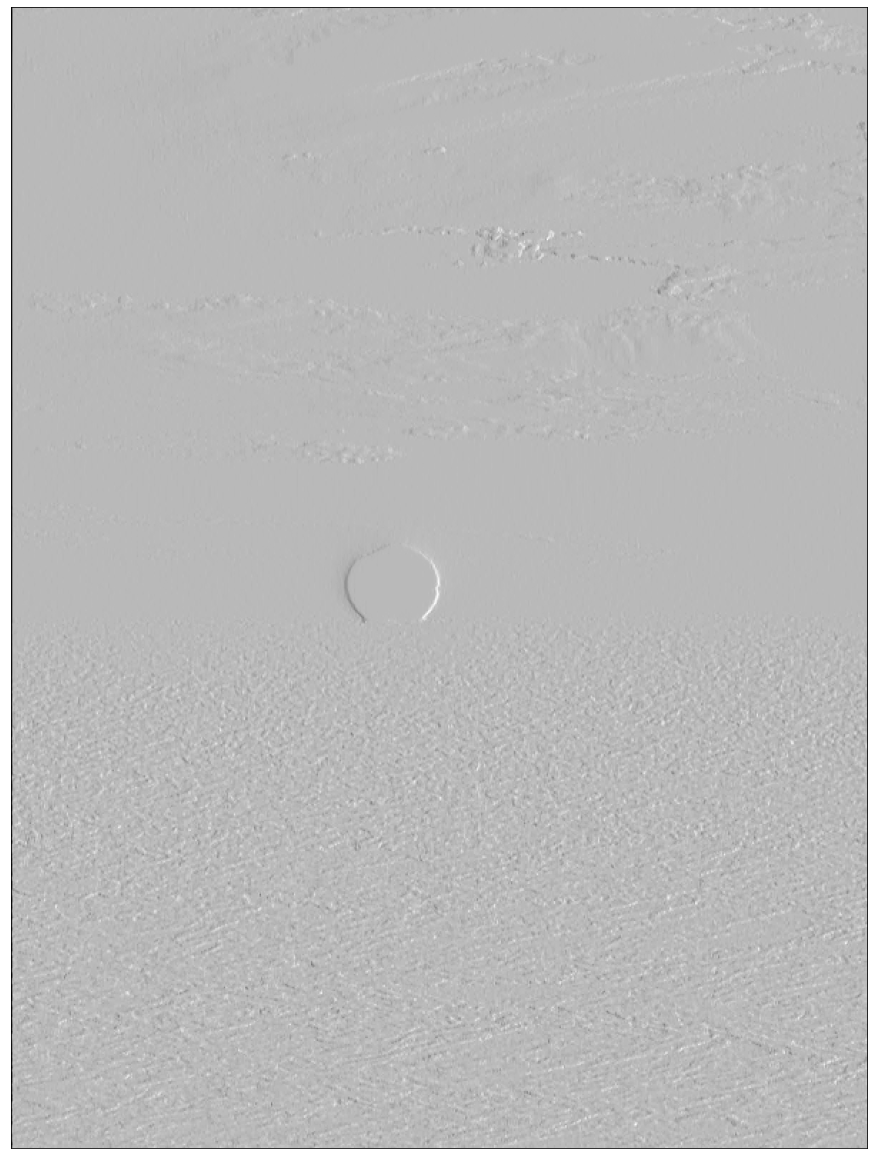

conv horizontal


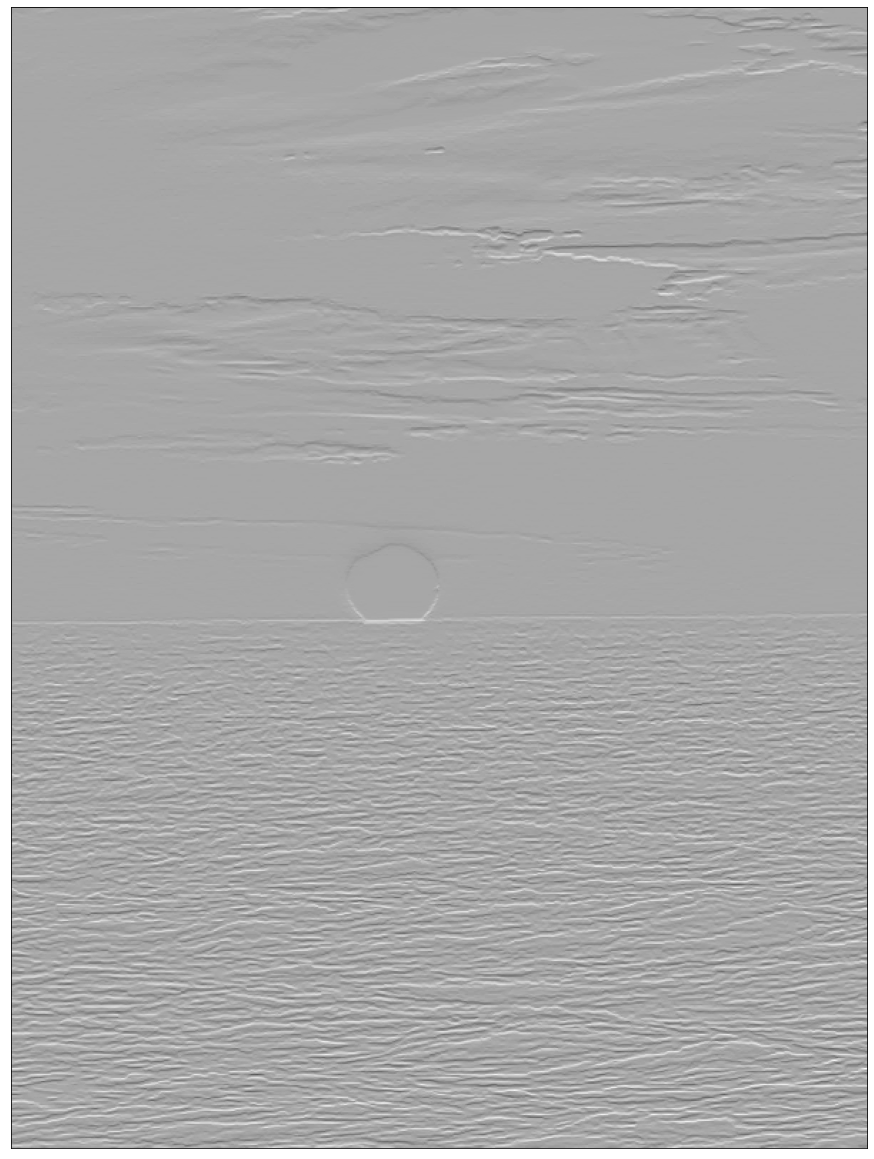

pool sign


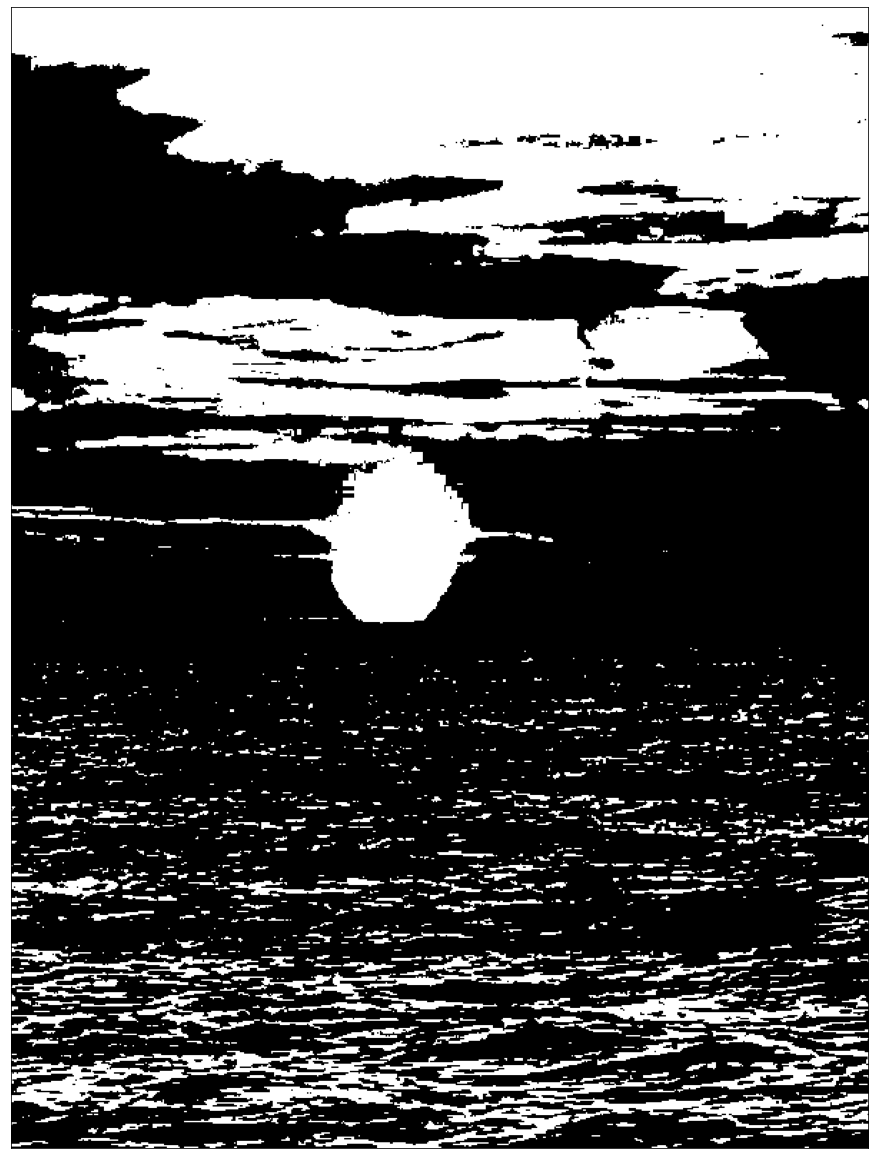

pool max


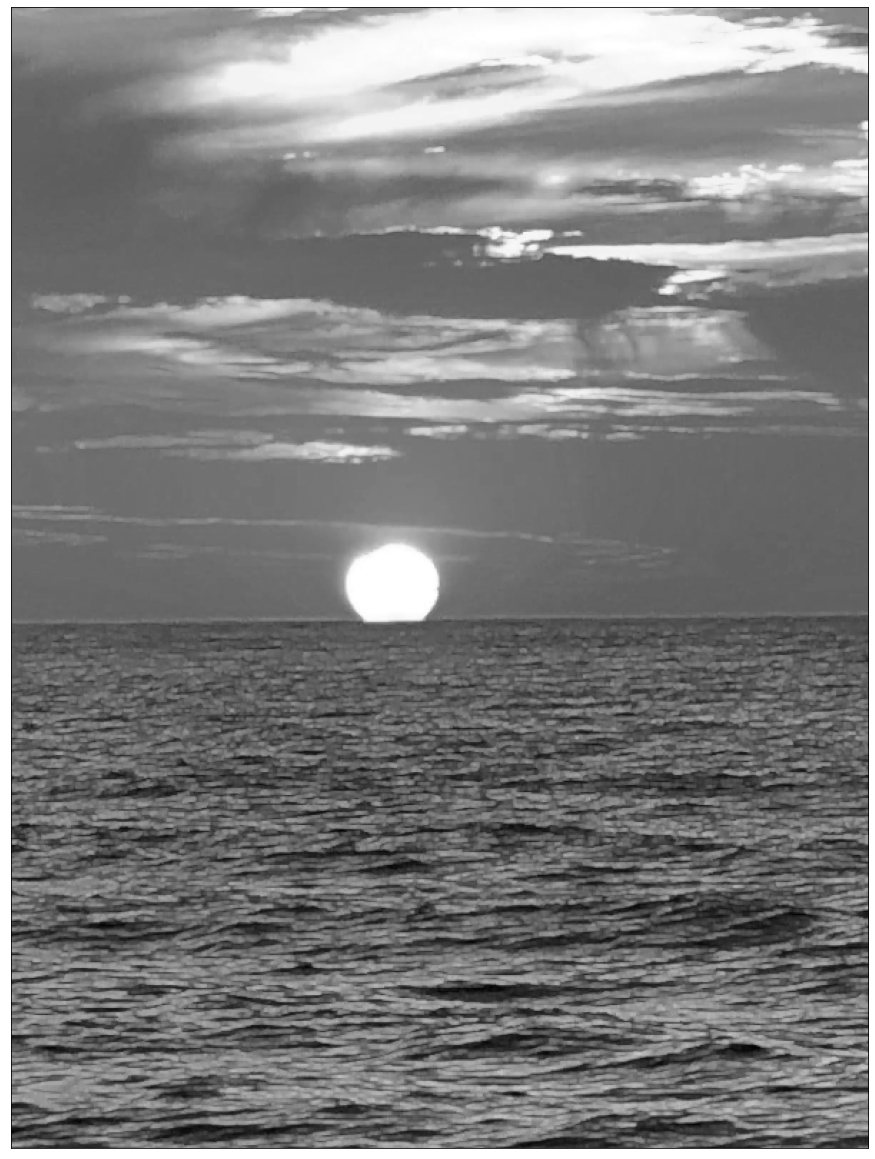

original


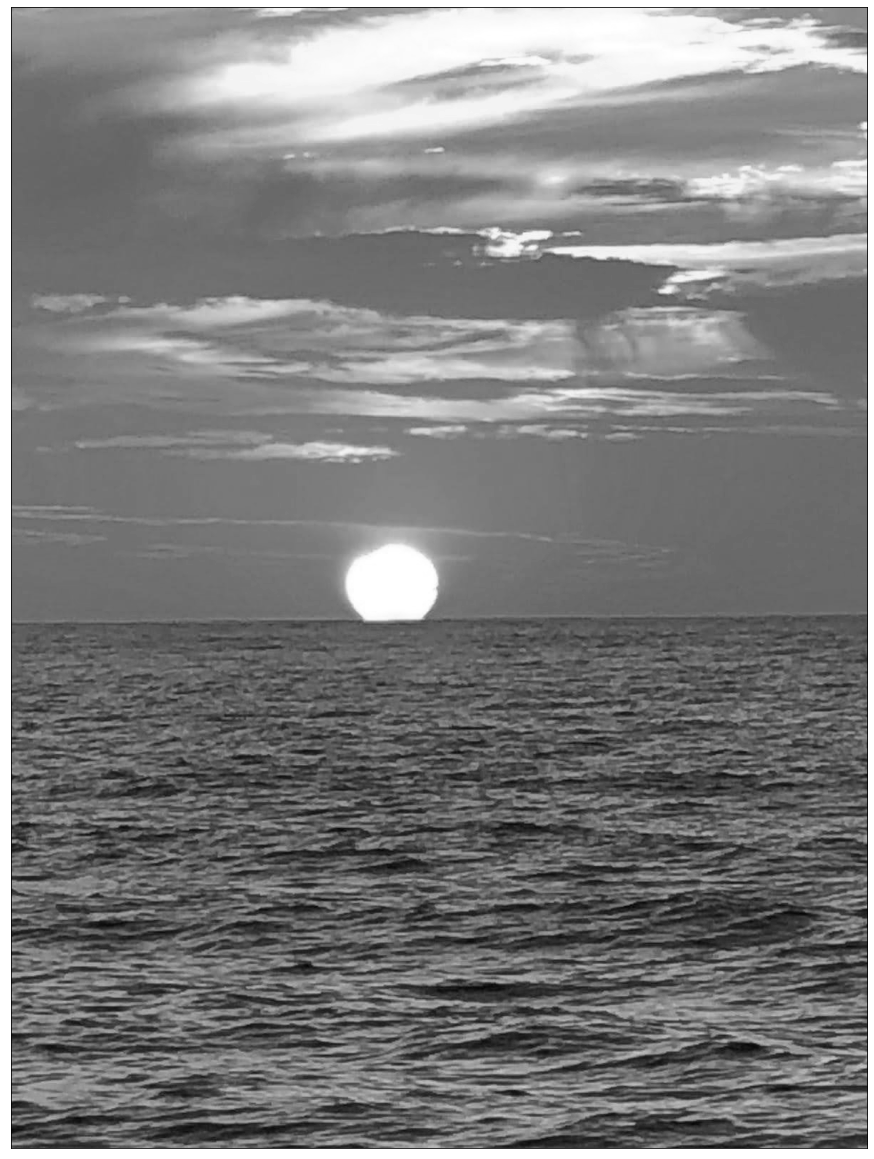

In [7]:
print('conv vertical')
plt_im(conv2(img,
             F=F_ver,
             p=1,
             s=[2, 2]))
print('conv horizontal')
plt_im(conv2(img,
             F=F_hor,
             p=1,
             s=[2, 2]))
print('pool sign')
plt_im(pool2(img, 
            k=[3, 2],
            s=[2, 2],
            action=lambda x: np.sign(x.mean() - 0.5)))
print('pool max')
plt_im(pool2(img, 
            k=[3, 2],
            s=[2, 2],
            action=np.max))
print('original')
plt_im(img)